In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve

import tensorflow as tf
import keras 

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, InputLayer, Flatten, Conv2D, MaxPooling2D

np.random.seed(42)
tf.random.set_seed(42)

In [8]:
df = pd.read_csv('../data/oasis_cross-sectional.csv')
df['CDR'].fillna(0, inplace=True)
labels = df['CDR']!=0

In [5]:
from image_processing.image_processing import load_MRI_gifs

In [10]:
tra = load_MRI_gifs(df['ID'], 'traverse')

In [3]:
tra = []
for path in df['ID']:
    path1 = '../data/Oasis_Data/' + path + '/PROCESSED/MPRAGE/T88_111/'
    for img in os.listdir(path1):
        if img.endswith('t88_gfc_tra_90.gif'):
            tra.append(plt.imread(path1+img))
tra = np.array(tra).astype(np.float64)/255

In [4]:
tra3 = np.repeat(tra[..., np.newaxis], 3, -1)

In [3]:
from preprocessing.getdata import *
df = get_csvdata()
dfTrain, dfTest, y_train, y_test = train_test_split(df, df['CDR'], stratify = df['CDR'], random_state=42)
N=3
X_train = get_slices(dfTrain['ID'], N=N, d=2, dim=0, m=100)
y_train = y_train.repeat(1+2*N)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(tra, labels.astype(int), test_size=0.25, random_state = 42)

In [4]:
X_train.shape

(952, 208, 176)

In [5]:
HEIGHT = X_train.shape[1]
WIDTH = X_train.shape[2]

In [6]:
model = tf.keras.applications.VGG16(weights=None, input_shape=(HEIGHT,WIDTH,1), classes=1, classifier_activation='sigmoid')

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-08-21 15:36:55.532833: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-21 15:36:55.533903: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
#resnet = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(HEIGHT,WIDTH,3), classes=1, classifier_activation='sigmoid')
resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(HEIGHT,WIDTH,3), classes=1, classifier_activation='sigmoid')
#resnet = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(HEIGHT,WIDTH,3), classes=1)
resnet.trainable = True
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-08-19 21:52:23.107661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-19 21:52:23.116965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
training = model.fit(X_train, y_train, batch_size = 32, validation_split=0.2, epochs = 20)

Epoch 1/20


2022-08-21 15:37:08.392297: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-21 15:37:09.639810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 847.2183 - accuracy: 0.5230

2022-08-21 15:39:01.098611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 125s 5s/step - loss: 847.2183 - accuracy: 0.5230 - val_loss: 1.5443 - val_accuracy: 0.5602
Epoch 2/20
24/24 [==============================] - 135s 6s/step - loss: 0.7684 - accuracy: 0.5059 - val_loss: 0.7006 - val_accuracy: 0.4031
Epoch 3/20
24/24 [==============================] - 95s 4s/step - loss: 0.6925 - accuracy: 0.5243 - val_loss: 0.7047 - val_accuracy: 0.4031
Epoch 4/20
24/24 [==============================] - 101s 4s/step - loss: 0.6931 - accuracy: 0.5243 - val_loss: 0.6977 - val_accuracy: 0.4031
Epoch 5/20
19/24 [======================>.......] - ETA: 20s - loss: 0.6979 - accuracy: 0.5082

KeyboardInterrupt: 

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.5,1.])
plt.show()

NameError: name 'training' is not defined

2022-08-19 21:14:59.349122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


accuracy:  0.79
recall:  0.0
precision:  0.0


/Users/denniseickhorn/neuefische/ds-capstone-alzheimers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


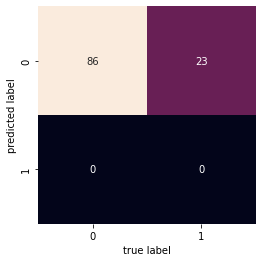

In [ ]:
y_predd = model.predict(X_test)
y_pred = (y_predd>0.5).astype(int)

# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred.round())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred.round()).round(2))
print('recall: ' , recall_score(y_test, y_pred.round()).round(2))
print('precision: ' , precision_score(y_test, y_pred.round()).round(2))

In [ ]:
y_predd

array([[2.68996274e-08],
       [1.39304657e-08],
       [2.87037061e-08],
       [4.34488676e-08],
       [3.32823440e-08],
       [2.52988173e-08],
       [1.49417989e-08],
       [2.99615692e-08],
       [1.61255102e-07],
       [2.13042526e-08],
       [3.50035059e-08],
       [1.84442285e-07],
       [5.24639816e-08],
       [7.54871792e-08],
       [2.15951736e-08],
       [5.28669872e-08],
       [7.56923413e-08],
       [6.54435652e-08],
       [3.34824932e-08],
       [2.36862796e-08],
       [1.20008153e-07],
       [4.09835330e-08],
       [4.35110650e-08],
       [8.05706506e-08],
       [5.11284561e-08],
       [6.92053504e-07],
       [1.01437454e-08],
       [1.04250306e-08],
       [1.98675529e-08],
       [1.15732412e-07],
       [3.38229817e-08],
       [6.54294681e-08],
       [2.25887202e-08],
       [5.67087319e-08],
       [2.98763716e-08],
       [1.37964848e-08],
       [6.91550923e-08],
       [9.61344355e-08],
       [1.19023937e-08],
       [3.01369276e-08],
